In [25]:
import pandas as pd 
import numpy as np
import plotly.express as px

In [26]:
df1 = pd.read_csv("diversity_school.csv")
df2 = pd.read_csv("tuition_cost.csv")

In [27]:
df = df1.merge(df2, left_on = ["name", "state"], right_on = ["name", "state"])

In [28]:
df.head()

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Liberty University,81459,Virginia,Women,48329,VA,Private,4 Year,10478.0,25276,35754,25276,35754
1,Liberty University,81459,Virginia,American Indian / Alaska Native,447,VA,Private,4 Year,10478.0,25276,35754,25276,35754
2,Liberty University,81459,Virginia,Asian,856,VA,Private,4 Year,10478.0,25276,35754,25276,35754
3,Liberty University,81459,Virginia,Black,14751,VA,Private,4 Year,10478.0,25276,35754,25276,35754
4,Liberty University,81459,Virginia,Hispanic,1186,VA,Private,4 Year,10478.0,25276,35754,25276,35754


In [29]:
column_names = df.columns.tolist()
column_names

['name',
 'total_enrollment',
 'state',
 'category',
 'enrollment',
 'state_code',
 'type',
 'degree_length',
 'room_and_board',
 'in_state_tuition',
 'in_state_total',
 'out_of_state_tuition',
 'out_of_state_total']

In [30]:
[df[i].unique() for i in column_names]

[array(['Liberty University', 'Miami Dade College',
        'Grand Canyon University', ..., 'Family of Faith College',
        'California Christian College', 'Myotherapy Institute'],
       dtype=object),
 array([81459, 66046, 62304, ...,    24,    20,    15], dtype=int64),
 array(['Virginia', 'Florida', 'Arizona', 'Utah', 'Minnesota', 'Texas',
        'California', 'Michigan', 'New York', 'Illinois', 'Washington',
        'New Hampshire', 'Pennsylvania', 'Nevada', 'Ohio', 'Georgia',
        'Iowa', 'North Carolina', 'Massachusetts', 'Oregon', 'Kentucky',
        'West Virginia', 'New Mexico', 'Kansas', 'Connecticut', 'Alabama',
        'Maryland', 'Tennessee', 'Delaware', 'Mississippi', 'Idaho',
        'South Carolina', 'Missouri', 'New Jersey', 'Indiana', 'Colorado',
        'Oklahoma', 'Rhode Island', 'Louisiana', 'Wisconsin',
        'North Dakota', 'Vermont', 'Wyoming', 'South Dakota', 'Arkansas',
        'Maine', 'Nebraska', 'Hawaii', 'Montana', 'Alaska'], dtype=object),
 array

In [31]:
[df[i].value_counts() for i in column_names]

[Liberty University                         11
 Quinebaug Valley Community College         11
 Ranken Technical College                   11
 New Mexico State University at Carlsbad    11
 Marymount Manhattan College                11
                                            ..
 Missouri Southern State University         11
 Weatherford College                        11
 Pennsylvania College of Technology         11
 Westmoreland County Community College      11
 Myotherapy Institute                       11
 Name: name, Length: 2154, dtype: int64,
 93      44
 705     44
 424     33
 1867    33
 1300    33
         ..
 6198    11
 6203    11
 6215    11
 6242    11
 15      11
 Name: total_enrollment, Length: 1937, dtype: int64,
 California        2134
 Texas             1364
 New York          1331
 Pennsylvania      1199
 North Carolina    1166
 Illinois          1045
 Ohio               946
 Massachusetts      847
 Georgia            748
 Michigan           726
 Florida         

In [32]:
# Check to find the null values in the dataframe

In [33]:
df.isin(["NA"]).any()

name                    False
total_enrollment        False
state                   False
category                False
enrollment              False
state_code              False
type                    False
degree_length           False
room_and_board          False
in_state_tuition        False
in_state_total          False
out_of_state_tuition    False
out_of_state_total      False
dtype: bool

In [34]:
df.isin(["NaN"]).any()

name                    False
total_enrollment        False
state                   False
category                False
enrollment              False
state_code              False
type                    False
degree_length           False
room_and_board          False
in_state_tuition        False
in_state_total          False
out_of_state_tuition    False
out_of_state_total      False
dtype: bool

In [35]:
df.isin([np.nan]).any()

name                    False
total_enrollment        False
state                   False
category                False
enrollment              False
state_code              False
type                    False
degree_length           False
room_and_board           True
in_state_tuition        False
in_state_total          False
out_of_state_tuition    False
out_of_state_total      False
dtype: bool

In [36]:
df.replace(to_replace = np.nan, value = pd.NA, inplace = True)

In [37]:
df.head()

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Liberty University,81459,Virginia,Women,48329,VA,Private,4 Year,10478.0,25276,35754,25276,35754
1,Liberty University,81459,Virginia,American Indian / Alaska Native,447,VA,Private,4 Year,10478.0,25276,35754,25276,35754
2,Liberty University,81459,Virginia,Asian,856,VA,Private,4 Year,10478.0,25276,35754,25276,35754
3,Liberty University,81459,Virginia,Black,14751,VA,Private,4 Year,10478.0,25276,35754,25276,35754
4,Liberty University,81459,Virginia,Hispanic,1186,VA,Private,4 Year,10478.0,25276,35754,25276,35754


In [38]:
df["degree_length"].str.split(" ")[23689][0]

'2'

In [39]:
degree_num = []

In [40]:
# Example of splitting data in order to get the integer without the unit.
df["degree_length"].str.split(" ")[0][0]

'4'

In [41]:
#[degree_num.append(df["degree_length"].str.split(" ")[i][0]) for i in df["degree_length"]]

In [42]:
# Appends the number from the years seperately.
for i in range(len(df)):
    #print(df["degree_length"].str.split(" ")[i][0])
    x = df["degree_length"][i].split(" ")[0]
    x = int(x)
    degree_num.append(x)
    
    
    

In [43]:
df["degree_year_length"] = degree_num

In [20]:
df.head()

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length
0,Liberty University,81459,Virginia,Women,48329,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
1,Liberty University,81459,Virginia,American Indian / Alaska Native,447,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
2,Liberty University,81459,Virginia,Asian,856,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
3,Liberty University,81459,Virginia,Black,14751,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
4,Liberty University,81459,Virginia,Hispanic,1186,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4


In [21]:
# Verify that all of the units are indeed years, just like the degree_year_length supouses.
df["degree_length"].value_counts()

4 Year    14234
2 Year     9460
Name: degree_length, dtype: int64

In [22]:
df_name = df.groupby("name").min().reset_index()

In [23]:
df_name.head()

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length
0,Aaniiih Nakoda College,291,Montana,American Indian / Alaska Native,0,MT,Public,2 Year,NaN,2380,2380,2380,2380,2
1,Abilene Christian University,4427,Texas,American Indian / Alaska Native,0,TX,Private,4 Year,10350.0,34850,45200,34850,45200,4
2,Abraham Baldwin Agricultural College,3458,Georgia,American Indian / Alaska Native,1,GA,Public,2 Year,8474.0,4128,12602,12550,21024,2
3,Academy College,127,Minnesota,American Indian / Alaska Native,0,MN,For Profit,2 Year,NaN,17661,17661,17661,17661,2
4,Academy of Art University,15212,California,American Indian / Alaska Native,70,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458,4


In [24]:
px.bar(df_name, x = df_name.value_counts().index, y = df_name.value_counts())

TypeError: Argument 'x' is a pandas MultiIndex. pandas MultiIndex is not supported by plotly express at the moment.

In [ ]:
df_propper = df.groupby(["name","state"]).count().reset_index()

In [ ]:
df_propper

In [ ]:
px.bar(df_propper, x = "name", y = df.value_count("state"))

In [ ]:
s = df_name["state"].value_counts()

In [ ]:
s

In [ ]:
len(df)

In [ ]:
sum(s)

In [ ]:
df.loc[df["state"] == "California"]

In [53]:
df.loc[df["name"] == "Aaniiih Nakoda College"]

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length
22264,Aaniiih Nakoda College,291,Montana,Women,178,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22265,Aaniiih Nakoda College,291,Montana,American Indian / Alaska Native,256,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22266,Aaniiih Nakoda College,291,Montana,Asian,0,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22267,Aaniiih Nakoda College,291,Montana,Black,0,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22268,Aaniiih Nakoda College,291,Montana,Hispanic,2,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22269,Aaniiih Nakoda College,291,Montana,Native Hawaiian / Pacific Islander,0,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22270,Aaniiih Nakoda College,291,Montana,White,33,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22271,Aaniiih Nakoda College,291,Montana,Two Or More Races,0,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22272,Aaniiih Nakoda College,291,Montana,Unknown,0,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2
22273,Aaniiih Nakoda College,291,Montana,Non-Resident Foreign,0,MT,Public,2 Year,<NA>,2380,2380,2380,2380,2


In [56]:
df.loc[df["name"] == "Aaniiih Nakoda College"]["enrollment"].sum()

727

In [54]:
df.groupby(["name"]).sum()

,total_enrollment,enrollment,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length
name,,,,,,,
Aaniiih Nakoda College,3201,727,26180,26180,26180,26180,22
Abilene Christian University,48697,8201,383350,497200,383350,497200,44
Abraham Baldwin Agricultural College,38038,5960,45408,138622,138050,231264,22
Academy College,1397,190,194271,194271,194271,194271,22
Academy of Art University,167332,27958,305910,489038,305910,489038,44
...,...,...,...,...,...,...,...
York Technical College,55671,10178,63140,63140,134090,134090,22
Young Harris College,13398,2082,320287,456379,320287,456379,44
Youngstown State University,137533,21592,98450,201850,164450,267850,44


In [49]:
fig = px.bar(df.groupby("category").sum() , x = "category", y = "enrollment")
fig

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['total_enrollment', 'enrollment', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'degree_year_length'] but received: category

In [55]:
df.loc[df["name"] == "Aaniiih Nakoda College"]["total_enrollment"]

22264    291
22265    291
22266    291
22267    291
22268    291
22269    291
22270    291
22271    291
22272    291
22273    291
22274    291
Name: total_enrollment, dtype: int64

In [72]:
df_grouped = df.groupby(["name", "category"]).sum().reset_index()

In [66]:
df.sort_values("name")["enrollment"]

22272       0
22266       0
22264     178
22265     256
22274     258
         ... 
10095     553
10096       0
10097     286
10087    2019
10091      14
Name: enrollment, Length: 23694, dtype: int64

In [67]:
#df_grouped["minnority_enrollment"] = df.sort_values("name")["enrollment"]

In [73]:
df_grouped

,name,category,total_enrollment,enrollment,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length
0,Aaniiih Nakoda College,American Indian / Alaska Native,291,256,2380,2380,2380,2380,2
1,Aaniiih Nakoda College,Asian,291,0,2380,2380,2380,2380,2
2,Aaniiih Nakoda College,Black,291,0,2380,2380,2380,2380,2
3,Aaniiih Nakoda College,Hispanic,291,2,2380,2380,2380,2380,2
4,Aaniiih Nakoda College,Native Hawaiian / Pacific Islander,291,0,2380,2380,2380,2380,2
...,...,...,...,...,...,...,...,...,...
23689,Zane State College,Total Minority,4009,286,5070,5070,9930,9930,2
23690,Zane State College,Two Or More Races,4009,135,5070,5070,9930,9930,2
23691,Zane State College,Unknown,4009,553,5070,5070,9930,9930,2
23692,Zane State College,White,4009,3170,5070,5070,9930,9930,2


In [74]:
df.loc[df["name"] == "Zane State College"]

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length
10087,Zane State College,4009,Ohio,Women,2019,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10088,Zane State College,4009,Ohio,American Indian / Alaska Native,16,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10089,Zane State College,4009,Ohio,Asian,10,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10090,Zane State College,4009,Ohio,Black,110,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10091,Zane State College,4009,Ohio,Hispanic,14,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10092,Zane State College,4009,Ohio,Native Hawaiian / Pacific Islander,1,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10093,Zane State College,4009,Ohio,White,3170,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10094,Zane State College,4009,Ohio,Two Or More Races,135,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10095,Zane State College,4009,Ohio,Unknown,553,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2
10096,Zane State College,4009,Ohio,Non-Resident Foreign,0,OH,Public,2 Year,<NA>,5070,5070,9930,9930,2


In [71]:
df_grouped[df_grouped["name"] == "Zane State College"]

,name,category,total_enrollment,enrollment,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length,minnority_enrollment
23683,Zane State College,American Indian / Alaska Native,4009,16,5070,5070,9930,9930,2,13
23684,Zane State College,Asian,4009,10,5070,5070,9930,9930,2,0
23685,Zane State College,Black,4009,110,5070,5070,9930,9930,2,0
23686,Zane State College,Hispanic,4009,14,5070,5070,9930,9930,2,0
23687,Zane State College,Native Hawaiian / Pacific Islander,4009,1,5070,5070,9930,9930,2,2
23688,Zane State College,Non-Resident Foreign,4009,0,5070,5070,9930,9930,2,0
23689,Zane State College,Total Minority,4009,286,5070,5070,9930,9930,2,13
23690,Zane State College,Two Or More Races,4009,135,5070,5070,9930,9930,2,0
23691,Zane State College,Unknown,4009,553,5070,5070,9930,9930,2,0
23692,Zane State College,White,4009,3170,5070,5070,9930,9930,2,0


In [63]:
df.head()

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,degree_year_length
0,Liberty University,81459,Virginia,Women,48329,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
1,Liberty University,81459,Virginia,American Indian / Alaska Native,447,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
2,Liberty University,81459,Virginia,Asian,856,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
3,Liberty University,81459,Virginia,Black,14751,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4
4,Liberty University,81459,Virginia,Hispanic,1186,VA,Private,4 Year,10478.0,25276,35754,25276,35754,4


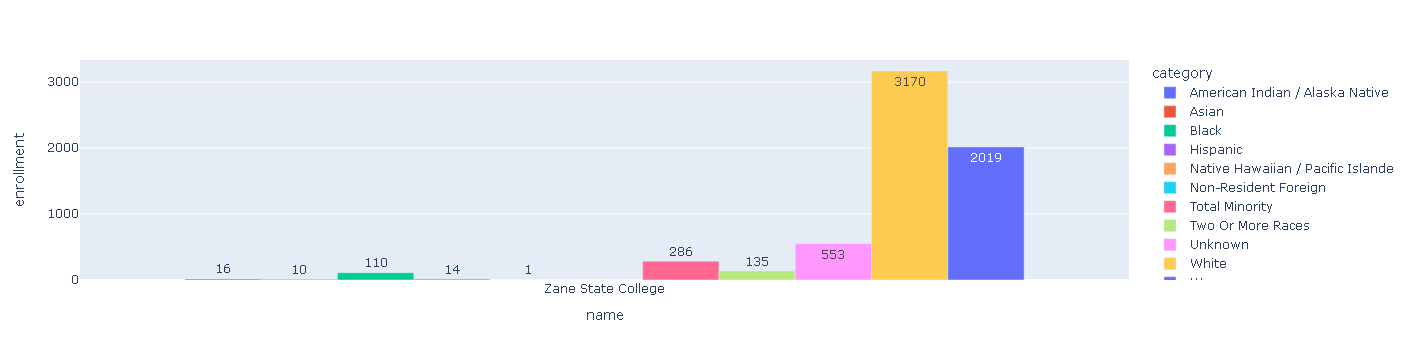

In [86]:
fig = px.bar(df_grouped[df_grouped["name"] == "Zane State College"], x = "name", y = "enrollment", color = "category", text_auto = True, barmode = "group")
fig

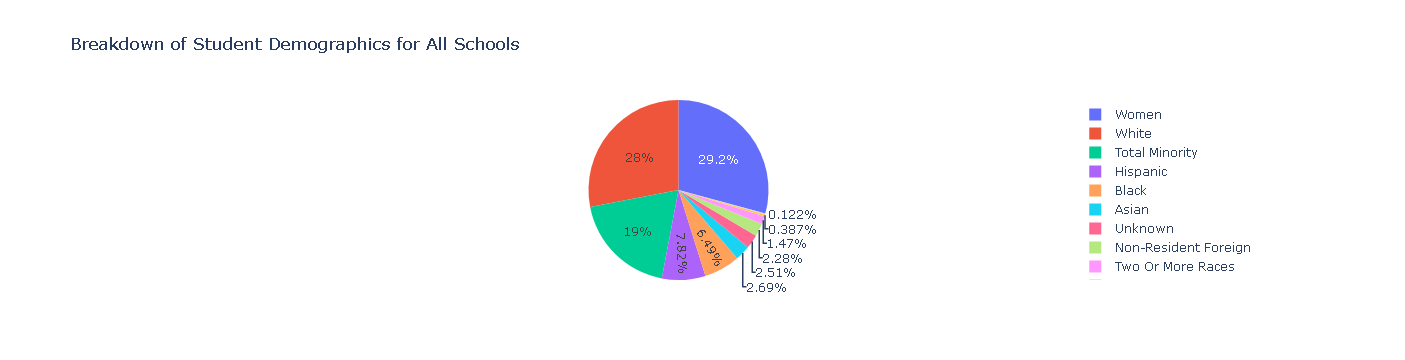

In [98]:
# Total
fig = px.pie(df_grouped, values = "enrollment", names = "category", title = "Breakdown of Student Demographics for All Schools")
fig

In [94]:
df_grouped[df_grouped["name"] == "Zane State College"]["enrollment"].sum() - df_grouped[df_grouped["name"] == "Zane State College"]["total_enrollment"].min()

2305

In [92]:
df_grouped[df_grouped["name"] == "Zane State College"]["total_enrollment"]

23683    4009
23684    4009
23685    4009
23686    4009
23687    4009
23688    4009
23689    4009
23690    4009
23691    4009
23692    4009
23693    4009
Name: total_enrollment, dtype: int64

#df.to_csv("college_degree_cleaned.csv", index = False)